<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/OdeSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 万有引力の働く系

万有引力が働く系
\begin{equation}
    m\ddot{\vec{r}}=-G\frac{Mm}{r^2}\vec{e}_r
    \Leftrightarrow
    \ddot{\vec{r}}=-\frac{GM}{r^2}\vec{e}_r
\end{equation}
を考える。
簡便のため $GM=1$ となるように単位系を取る。
このとき系を直交座標系に書き換えると
\begin{equation}
    \ddot{x}=-\frac{x}{(x^2+y^2)^{5/2}},\quad
    \ddot{y}=-\frac{y}{(x^2+y^2)^{5/2}}
\end{equation}
となる。
更にハミルトン系へと書き換えると
\begin{align}
    &\dot{q}_x=p_x,\quad
    \dot{p}_x=-\frac{q_x}{(q_x^2+q_y^2)^{3/2}},\\
    &\dot{q}_y=p_y,\quad
    \dot{p}_y=-\frac{q_y}{(q_x^2+q_y^2)^{3/2}}
\end{align}
となる。
エネルギーは運動の積分で
\begin{equation}
    E=\frac{1}{2}(p_x^2+p_y^2)-\frac{1}{(q_x^2+q_y^2)^{1/2}}
\end{equation}
である。


In [1]:
from typing import List, Callable

def dqxdt(x: List[float]) -> float:
    return x[2]

def dqydt(x: List[float]) -> float:
    return x[3]

def dpxdt(x: List[float]) -> float:
    return -x[0]/(x[0]**2 + x[1]**2)**1.5

def dpydt(x: List[float]) -> float:
    return -x[1]/(x[0]**2 + x[1]**2)**1.5

# 運動方程式
dxdt: List[Callable[[List[float]], float]] = [dqxdt,dqydt,dpxdt,dpydt]

陽的解法のソルバーを定義

In [14]:
import math
import numpy as np
from numpy import ndarray

def explicit_solver(
    method: Callable[[List[Callable[[List[float]], float]],List[float]],
                     List[float]],
    dxdt: List[Callable[[List[float]], float]],
    init: List[float], t_end: float) -> ndarray:
    # 次元チェック
    if len(dxdt) != len(init):
        raise Exception("Dimension error!")

    # ソルバーのパラメータ
    dt: float = 1e-2
    steps: List[int] = range(1, math.floor(t_end/dt), 1)

    # 初期状態
    x_list: List[list[float]] = [init]
    e_list: List[float] = [(init[2]**2+init[3]**2)/2
                           -(init[0]**2+init[1]**2)**(-1/2)]
    # ソルバー実施
    for t in steps:
        x_next: List[float] = method(dxdt, x_list[-1], dt)
        x_list.append(x_next)
        e_list.append(
            (x_next[2]**2+x_next[3]**2)/2-(x_next[0]**2+x_next[1]**2)**(-1/2)
        )

    # 位置・運動量・エネルギーを戻り値として戻す
    return np.vstack((np.array(x_list).T, np.array(e_list)))

## オイラー法

In [15]:
def euler(dxdt: List[Callable[[List[float]], float]],
          x: List[float], dt: float) -> List[float]:
    ans: List[float] = [0,0,0,0]
    for k in range(len(x)):
        ans[k] = x[k] + dxdt[k](x) * dt
    return ans

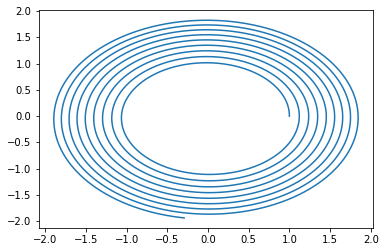

In [16]:
import matplotlib.pyplot as plt

ans: ndarray = explicit_solver(euler, dxdt, [1,0,0,1], 100)
plt.plot(ans[0], ans[1])

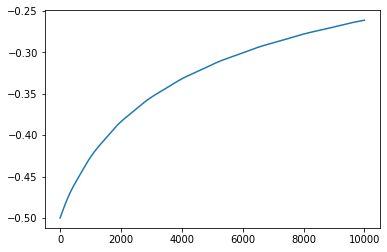

In [17]:
plt.plot(ans[4])